In [13]:
from bertopic import BERTopic
import os
import os.path
# https://github.com/MaartenGr/BERTopic/issues/517#issuecomment-1140725239
import pyspark
import pynndescent
pynndescent.rp_trees.FlatTree.__module__  = "pynndescent.rp_trees"

In [8]:
authors = [
    "Topsoee", "JacobsenJP", "SkramE", "SkramA", "AndersenHC",
    "Bauditz", "Bang", "Kielland", "Schandorph", "Drachman",
    "Hamsun", "HansenJH", "Pontoppidan", "GB",
    "Levison", "Fibiger"
    ]
paths = [os.path.join("korpus", filename) for filename in os.listdir("korpus")
         if filename.endswith(".txt") and
         any((("_" + author + "_") in filename) for author in authors)]
len(paths)

67

In [9]:
def split(list_a, chunk_size):
    for i in range(0, len(list_a), chunk_size):
        yield list_a[i:i + chunk_size]

In [38]:
docs_titles = []
for path in paths:
    with open(path, encoding="utf-8") as f:  # 75 token chunks
        docs_titles += [(" ".join(chunk), os.path.split(path)[-1][:-4]) for chunk in split(f.read().split(), 75)]
docs, titles = zip(*docs_titles)
docs[:3], len(docs), titles[:3]

(('Første Kapitel . Ude paa Atlanterhavet gik det kongelige , brittiske Postdampskib Bombay . Det kom fra Kalkutta , havde passeret Suezkanalen og var efter en hurtig og heldig Fart gjennem Middelhavet og den spanske Sø nu paa Slutningen af sin lange Fart mod den engelske Kyst . Det var frisk Sommervejr . Det store , sorte Dampskib skar langsomf gyngende gjennem disse bredt opsvulmende Vandhøje , hver enkelt dækket med mange mindre Toppe og',
  'Krusninger , som udgjore de store Haves Bølger . Lidt Seil havde man sat til , men de stærke Maskiner arbejdede tilsyneladende lige anstrængt alligevel , og Røgen afvexlende hvæsede og bølgede ud af Skorstenen , der var bred og tyk som et lille Taarn . Køligt var der derude , mange Grader lavere Temperatur end inde paa det usynlige Land , der laa langt østenfør ; men Luften var et Mønster paa denne stærke',
  ', sfrappe Søluft , fom synes at fæstne Legemet i sit omsluttende Tag . Det var en prægtig Sommerdag paa Søen . En prægtig Sommerdag , me

In [26]:
topic_model = BERTopic(language="multilingual", calculate_probabilities=True)
topics, probs = topic_model.fit_transform(docs)
topics, probs

([63,
  6,
  6,
  -1,
  -1,
  63,
  -1,
  -1,
  -1,
  15,
  -1,
  13,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  58,
  0,
  -1,
  -1,
  -1,
  -1,
  49,
  -1,
  -1,
  -1,
  46,
  63,
  -1,
  63,
  -1,
  63,
  -1,
  -1,
  -1,
  63,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  100,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  28,
  -1,
  -1,
  28,
  58,
  28,
  28,
  192,
  -1,
  58,
  229,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  63,
  63,
  -1,
  -1,
  63,
  63,
  63,
  -1,
  -1,
  171,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  63,
  58,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  63,
  0,
  -1,
  15,
  15,
  -1,
  -1,
  -1,
  -1,
  18,
  18,
  18,
  0,
  0,
  0,
  18,
  18,
  -1,
  -1,
  -1,
  -1,
  -1,
  18,
  -1,
  -1,
  -1,
  -1,
  -1,
  6,
  -1,
  -1,
  100,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  21,
  -1,
  -1,
  -1,
  -1,
  1,
  -1,
  -1,
  116,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
 

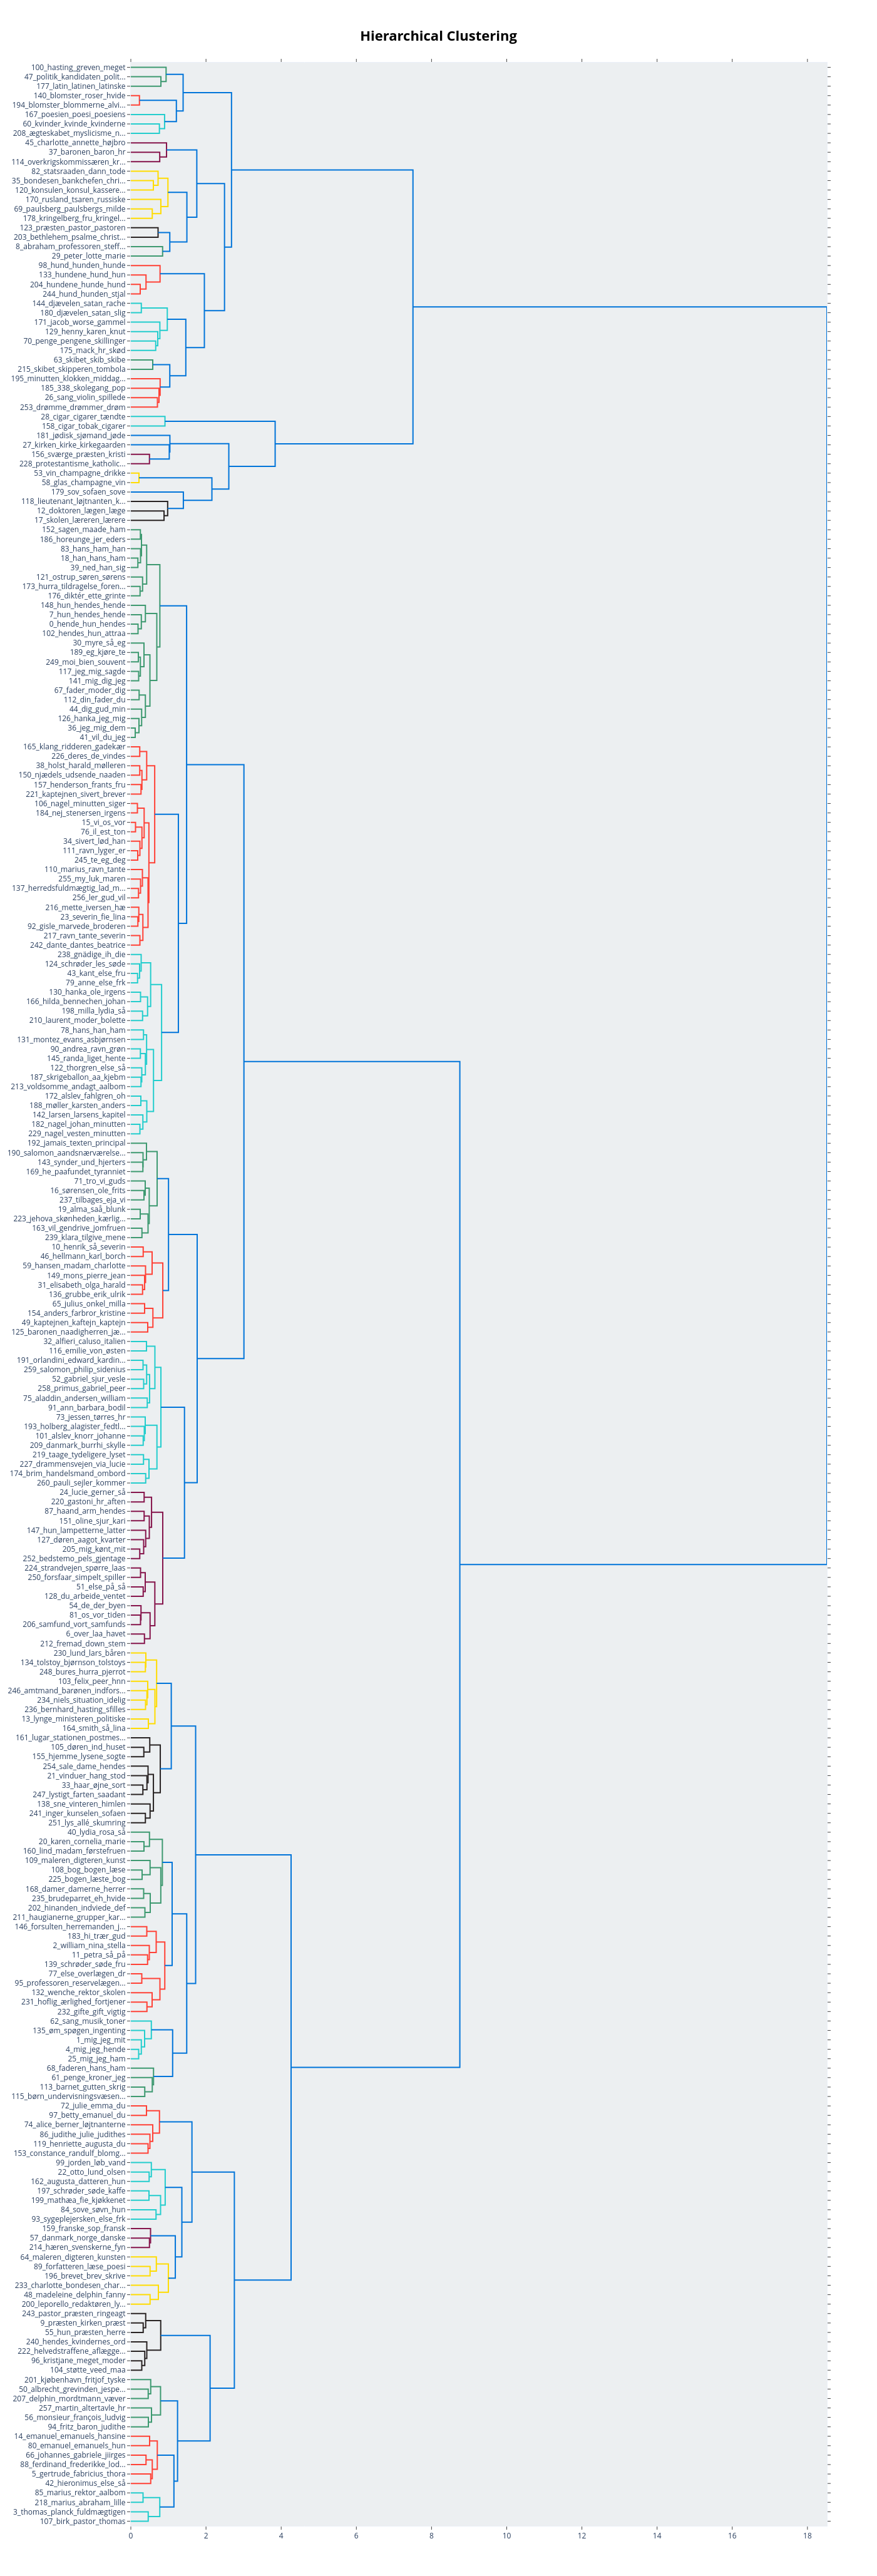

In [32]:
topic_model.visualize_hierarchy()

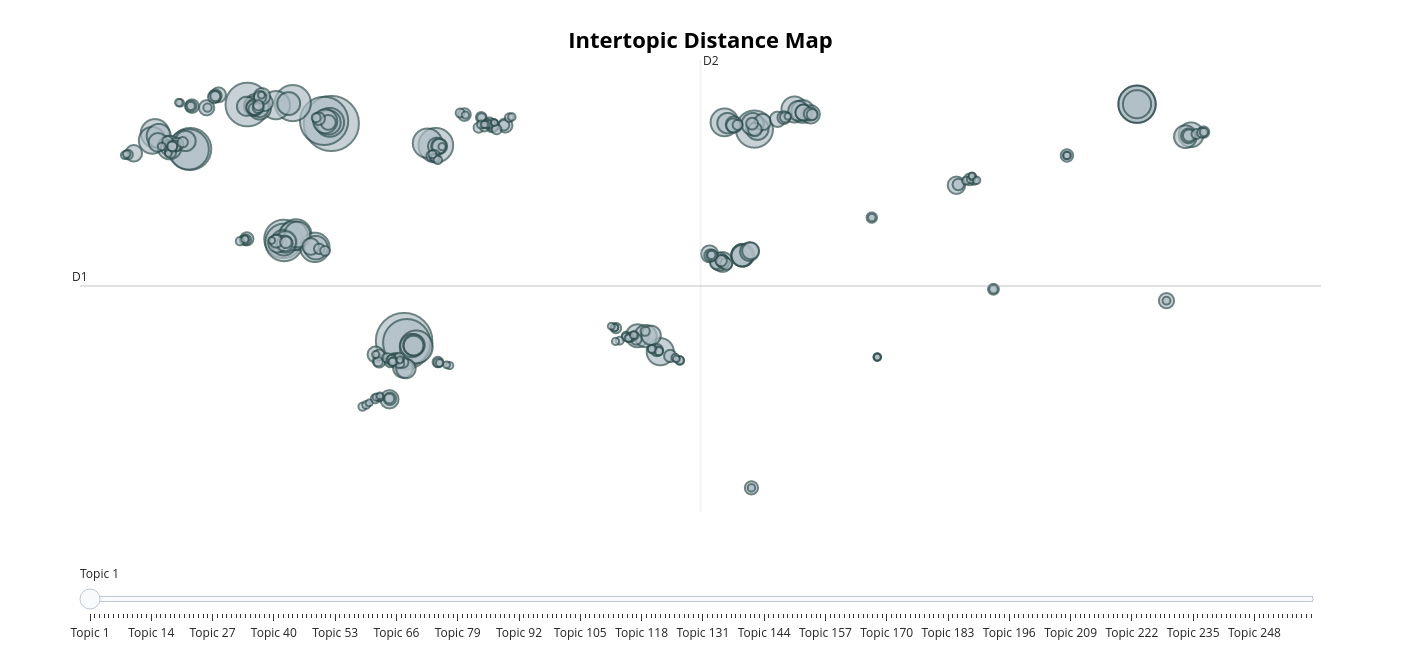

In [33]:
topic_model.visualize_topics()

In [39]:
import pandas as pd
'''
Extract the first n documents corresponding to each topic as fitted by the model according to the probability scores. 
'''
prob_df = pd.DataFrame(probs).transpose()
col_names = ['Topic '+str(i) for i in range(prob_df.shape[0])]
docs_per_topic_df = pd.DataFrame(columns=col_names, index=range(10))
ind_list = []
for i in range(prob_df.shape[0]):
    ind_list = list(prob_df.sort_values(by=i, axis=1, ascending=False).iloc[:, :10].columns)
    doc_list = []
    for j in ind_list:
        doc_list.append(titles[j])
    docs_per_topic_df['Topic '+str(i)] = doc_list
docs_per_topic_df

Topic 0                         Topic 1  \
0                 1880_Schandorph_Smaafolk                1890_Hamsun_Sult   
1      1892_Pontoppidan_DetForjaettedeLand  1876_JacobsenJP_FruMarieGrubbe   
2              1888_Pontoppidan_Spoegelser                1890_Hamsun_Sult   
3                       1883_Kielland_Gift     1897_Schandorph_FroekenGram   
4                    1882_HansenJH_Barbara                1890_Hamsun_Sult   
5                     1880_Fibiger_Askepot                1890_Hamsun_Sult   
6                       1883_Kielland_Gift                1890_Hamsun_Sult   
7  1899_Pontoppidan_LykkePerHansKaerlighed                1890_Hamsun_Sult   
8  1899_Pontoppidan_LykkePerHansKaerlighed                1890_Hamsun_Sult   
9             1897_Pontoppidan_Kirkeskuden                1890_Hamsun_Sult   

                       Topic 2                              Topic 3  \
0  1880_Bang_HaabloeseSlaegter  1881_Schandorph_ThomasFrissHistorie   
1  1880_Bang_HaabloeseSlaegter  1881_Schandorph_ThomasFrissHistorie   
2  1880_Bang_HaabloeseSlaegter  1881_Schandorph_ThomasFrissHistorie   
3  1880_Bang_HaabloeseSlaegter  1881_Schandorph_ThomasFrissHistorie   
4  1880_Bang_HaabloeseSlaegter  1881_Schandorph_ThomasFrissHistorie   
5  1880_Bang_HaabloeseSlaegter  1881_Schandorph_ThomasFrissHistorie   
6  1880_Bang_HaabloeseSlaegter  1881_Schandorph_ThomasFrissHistorie   
7  1880_Bang_HaabloeseSlaegter  1881_Schandorph_ThomasFrissHistorie   
8  1880_Bang_HaabloeseSlaegter  1881_Schandorph_ThomasFrissHistorie   
9  1880_Bang_HaabloeseSlaegter  1881_Schandorph_ThomasFrissHistorie   

            Topic 4                           Topic 5  \
0  1890_Hamsun_Sult  1879_SkramE_GertrudeColbjoernsen   
1  1890_Hamsun_Sult  1879_SkramE_GertrudeColbjoernsen   
2   1894_Hamsun_Pan  1879_SkramE_GertrudeColbjoernsen   
3   1894_Hamsun_Pan  1879_SkramE_GertrudeColbjoernsen   
4   1894_Hamsun_Pan  1879_SkramE_GertrudeColbjoernsen   
5   1894_Hamsun_Pan  1879_SkramE_GertrudeColbjoernsen   
6   1894_Hamsun_Pan  1879_SkramE_GertrudeColbjoernsen   
7   1894_Hamsun_Pan  1879_SkramE_GertrudeColbjoernsen   
8   1894_Hamsun_Pan  1879_SkramE_GertrudeColbjoernsen   
9  1890_Hamsun_Sult  1879_SkramE_GertrudeColbjoernsen   

                                   Topic 6  \
0               1876_Bauditz_Himmelbjerget   
1               1880_JacobsenJP_NielsLyhne   
2         1879_SkramE_GertrudeColbjoernsen   
3  1899_Pontoppidan_LykkePerHansKaerlighed   
4              1880_Kielland_GarmanOgWorse   
5                     1880_Fibiger_Askepot   
6        1883_Pontoppidan_SandingeMenighed   
7        1884_Schandorph_Skovfogedboernene   
8           1876_JacobsenJP_FruMarieGrubbe   
9      1881_Schandorph_ThomasFrissHistorie   

                               Topic 7                   Topic 8  \
0                 1880_Fibiger_Askepot        1883_Kielland_Gift   
1             1887_Levison_Konsulinden     1884_Kielland_Fortuna   
2  1892_Pontoppidan_DetForjaettedeLand     1884_Kielland_Fortuna   
3             1887_Levison_Konsulinden     1884_Kielland_Fortuna   
4                1891_Pontoppidan_Muld     1884_Kielland_Fortuna   
5                    1886_Kielland_Sne        1883_Kielland_Gift   
6    1884_Schandorph_Skovfogedboernene        1883_Kielland_Gift   
7    1883_Pontoppidan_SandingeMenighed  1881_Fibiger_MineSoestre   
8           1880_JacobsenJP_NielsLyhne        1883_Kielland_Gift   
9  1881_Schandorph_ThomasFrissHistorie     1884_Kielland_Fortuna   

                               Topic 9  ...  \
0          1880_Bang_HaabloeseSlaegter  ...   
1           1880_JacobsenJP_NielsLyhne  ...   
2        1899_Schandorph_GamleBilleder  ...   
3                1891_Pontoppidan_Muld  ...   
4              1877_HansenJH_EnFriMand  ...   
5                1891_Pontoppidan_Muld  ...   
6         1892_Schandorph_PoetOgJunker  ...   
7              1877_HansenJH_EnFriMand  ...   
8  1881_Schandorph_ThomasFrissHistorie  ...   
9                   1883_Kielland_Gift  

In [40]:
freq = docs_per_topic_df.apply(pd.Series.value_counts, axis=0).fillna(0)
freq

Topic 0  Topic 1  Topic 2  \
1870_AndersenHC_LykkePeer                               0.0      0.0      0.0   
1870_GB_PolitispionenEllerHaelerhusetPaaKristia...      0.0      0.0      0.0   
1875_Topsoee_JasonMedDetGyldneSkind                     0.0      0.0      0.0   
1876_Bauditz_Himmelbjerget                              0.0      0.0      0.0   
1876_JacobsenJP_FruMarieGrubbe                          0.0      1.0      0.0   
...                                                     ...      ...      ...   
1898_SkramE_HellenVige                                  0.0      0.0      0.0   
1899_Bang_LivOgDoed                                     0.0      0.0      0.0   
1899_Pontoppidan_LykkePerHansKaerlighed                 2.0      0.0      0.0   
1899_Pontoppidan_LykkePerIDetFremmede                   0.0      0.0      0.0   
1899_Schandorph_GamleBilleder                           0.0      0.0      0.0   

                                                    Topic 3  Topic 4  Topic 5  \
1870_AndersenHC_LykkePeer                               0.0      0.0      0.0   
1870_GB_PolitispionenEllerHaelerhusetPaaKristia...      0.0      0.0      0.0   
1875_Topsoee_JasonMedDetGyldneSkind                     0.0      0.0      0.0   
1876_Bauditz_Himmelbjerget                              0.0      0.0      0.0   
1876_JacobsenJP_FruMarieGrubbe                          0.0      0.0      0.0   
...                                                     ...      ...      ...   
1898_SkramE_HellenVige                                  0.0      0.0      0.0   
1899_Bang_LivOgDoed                                     0.0      0.0      0.0   
1899_Pontoppidan_LykkePerHansKaerlighed                 0.0      0.0      0.0   
1899_Pontoppidan_LykkePerIDetFremmede                   0.0      0.0      0.0   
1899_Schandorph_GamleBilleder                           0.0      0.0      0.0   

                                                    Topic 6  Topic 7  Topic 8  \
1870_AndersenHC_LykkePeer                               0.0      0.0      0.0   
1870_GB_PolitispionenEllerHaelerhusetPaaKristia...      0.0      0.0      0.0   
1875_Topsoee_JasonMedDetGyldneSkind                     0.0      0.0      0.0   
1876_Bauditz_Himmelbjerget                              1.0      0.0      0.0   
1876_JacobsenJP_FruMarieGrubbe                          1.0      0.0      0.0   
...                                                     ...      ...      ...   
1898_SkramE_HellenVige                                  0.0      0.0      0.0   
1899_Bang_LivOgDoed                                     0.0      0.0      0.0   
1899_Pontoppidan_LykkePerHansKaerlighed                 1.0      0.0      0.0   
1899_Pontoppidan_LykkePerIDetFremmede                   0.0      0.0      0.0   
1899_Schandorph_GamleBilleder                           0.0      0.0      0.0   

                                                    Topic 9  ...  Topic 251  \
1870_AndersenHC_LykkePeer                               0.0  ...        0.0   
1870_GB_PolitispionenEllerHaelerhusetPaaKristia...      0.0  ...        0.0   
1875_Topsoee_JasonMedDetGyldneSkind                     0.0  ...        0.0   
1876_Bauditz_Himmelbjerget                              0.0  ...        0.0   
1876_JacobsenJP_FruMarieGrubbe                          0.0  ...        0.0   
...                                                     ...  ...        ...   
1898_SkramE_HellenVige                                  0.0  ...        0.0   
1899_Bang_LivOgDoed                                     0.0  ...        0.0   
1899_Pontoppidan_LykkePerHansKaerlighed                 0.0  ...        0.0   
1899_Pontoppidan_LykkePerIDetFremmede                   0.0  ...        0.0   
1899_Schandorph_GamleBilleder                           1.0  ...        0.0   

                                                    Topic 252  Topic 253  \
1870_AndersenHC_LykkePeer                                 0.0        0.0   
1870_GB_PolitispionenEllerHaeler

In [37]:
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.7 MB/s eta 0:00:00:00:010:01


In [47]:
import networkx as nx
from networkx.algorithms import bipartite

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

B_full = bipartite.complete_bipartite_graph(freq)
plt.figure(figsize=(20, 20))
nx.draw_networkx(B_full, pos=nx.drawing.layout.bipartite_layout(B_full, list(freq.index)), 
                 with_labels=False, node_size=100)
plt.show()
nx.write_graphml_lxml(B_full, "/work/bipartite.graphml")

NetworkXError: Adjacency matrix not square: nx,ny=(67, 261)